In [35]:
import pandas as pd
import pickle

from pca import pca
import plotly.express as px

In [4]:
pca_df = pd.read_csv('../data/SynMutspecPCA.csv')

In [28]:
pca_df.head()

,Species,A[A>C]A,A[A>C]C,A[A>C]G,A[A>C]T,A[A>G]A,A[A>G]C,A[A>G]G,A[A>G]T,A[A>T]A,A[A>T]C,A[A>T]G,A[A>T]T,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,A[C>T]G,A[C>T]T,A[G>A]A,A[G>A]C,A[G>A]G,A[G>A]T,A[G>C]A,A[G>C]C,A[G>C]G,A[G>C]T,A[G>T]A,A[G>T]C,A[G>T]G,A[G>T]T,A[T>A]A,A[T>A]C,A[T>A]G,...,T[A>T]A,T[A>T]C,T[A>T]G,T[A>T]T,T[C>A]A,T[C>A]C,T[C>A]G,T[C>A]T,T[C>G]A,T[C>G]C,T[C>G]G,T[C>G]T,T[C>T]A,T[C>T]C,T[C>T]G,T[C>T]T,T[G>A]A,T[G>A]C,T[G>A]G,T[G>A]T,T[G>C]A,T[G>C]C,T[G>C]G,T[G>C]T,T[G>T]A,T[G>T]C,T[G>T]G,T[G>T]T,T[T>A]A,T[T>A]C,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
0,Abbottina_obtusirostris,0.0,0.0,0.0,0.0,0.000000,0.0,0.153061,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.051020,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,Abbottina_rivularis,0.0,0.0,0.0,0.0,0.002474,0.0,0.000000,0.000000,0.0,0.014842,0.0,0.0,0.003711,0.0,0.002968,0.0,0.0,0.0,0.008905,0.0,0.018553,0.051948,0.011874,0.014842,0.011874,0.007421,0.006184,0.00212,0.0,0.0,0.0,0.0,0.0,0.0,0.003298,0.0,0.0,0.0,0.0,...,0.003711,0.0,0.0,0.0,0.009895,0.0,0.0,0.0,0.004947,0.0,0.0,0.0,0.017811,0.014842,0.025974,0.022263,0.005937,0.007421,0.014842,0.005566,0.00212,0.0,0.0,0.0,0.006361,0.014842,0.009895,0.0,0.002474,0.0,0.0,0.0,0.005937,0.0,0.004947,0.004947,0.002474,0.0,0.0,0.0
2,Abramis_brama,0.0,0.0,0.0,0.0,0.000000,0.0,0.014925,0.026533,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.059700,0.000000,0.000000,0.005970,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.029850,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.059700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.095520,0.0,0.017057,0.0,0.0,0.0,0.027554,0.0,0.010855,0.000000,0.000000,0.0,0.0,0.0
3,Acanthogobius_hasta,0.0,0.0,0.0,0.0,0.000000,0.0,0.038894,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.311150,0.311150,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,Acanthopagrus_latus,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.461538,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [17]:
cor_matrix = pca_df.drop('Species', axis=1).corr()

In [38]:
fig = px.imshow(cor_matrix, aspect='auto')
fig.write_html('../pictures/heatmap_cor_cdn.html')
fig.show()

In [50]:
model = pca(normalize=True)

In [55]:
pca_df.index = pca_df['Species']
pca_df = pca_df.drop('Species', axis=1)

In [62]:
results = model.fit_transform(pca_df, col_labels= pca_df.columns, row_labels=pca_df.index)

[pca] >Cleaning previous fitted model results..
[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [192] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[134]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


[pca] >Plot PC1 vs PC2 with loadings.


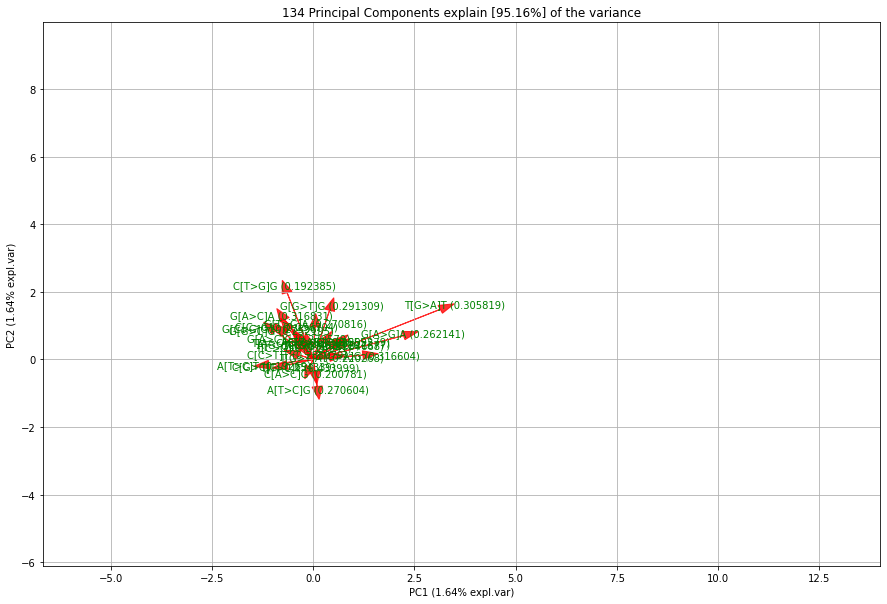

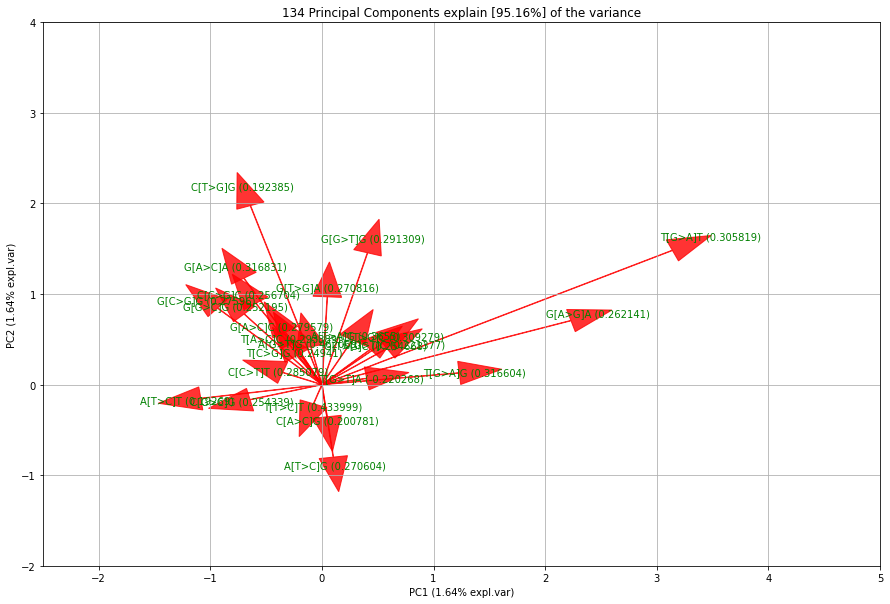

In [73]:
fig, ax = model.biplot(label=False, legend=False, cmap=None)
ax.set_xlim([-2.5,5])
ax.set_ylim([-2,4])
fig

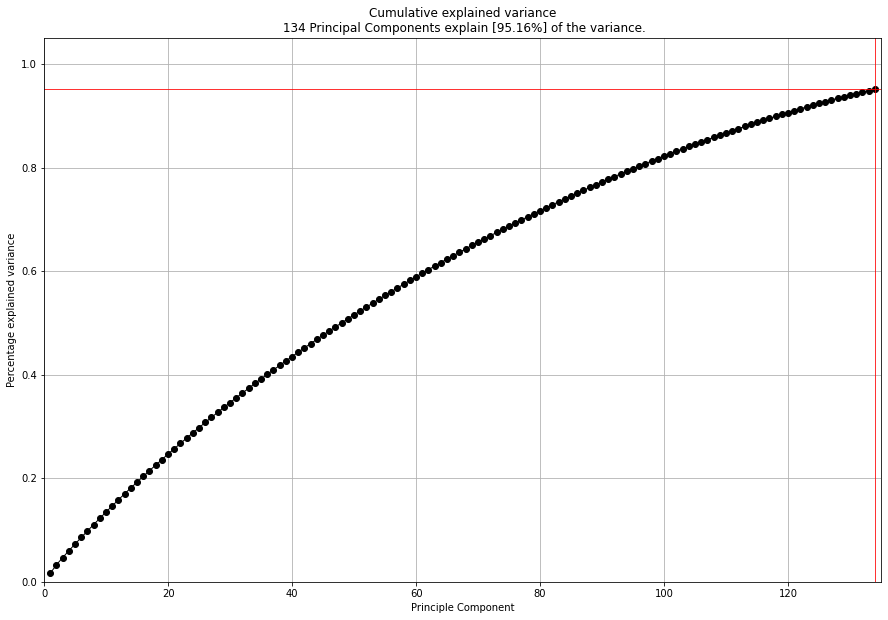

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 134 Principal Components explain [95.16%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [66]:
model.plot()

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


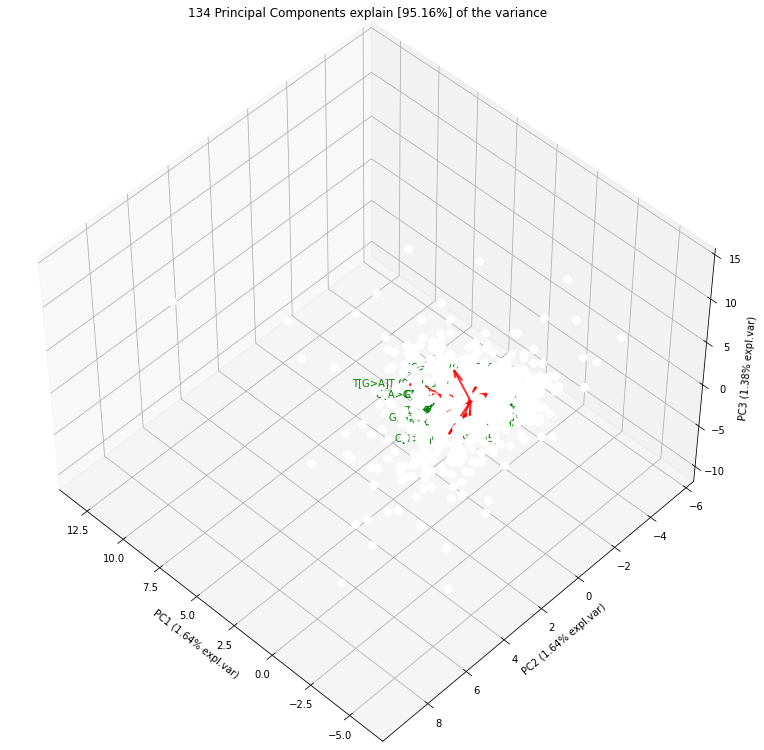

(<Figure size 1080x720 with 2 Axes>,
 <Axes3D:title={'center':'134 Principal Components explain [95.16%] of the variance'}, xlabel='PC1 (1.64% expl.var)', ylabel='PC2 (1.64% expl.var)'>)

In [67]:
model.biplot3d(label=False, legend=False, cmap=None)